## LEAD SCORING CASE STUDY

In [628]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [629]:
# Importing python built in libraries

import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# To scale our data
from sklearn.preprocessing import scale

### GENERIC FUNCTION 

In [630]:
def get_nulls_report(df,apply_style="Y"):
    if apply_style=="Y":
        cm = sns.light_palette("orange", as_cmap=True)
        return pd.DataFrame([df.isnull().sum(),round(100*(df.isnull().sum()/len(df.index)), 2)]).T.rename(columns={0:'Total Nulls',1:'Nulls Percentage'}).\
sort_values(by='Nulls Percentage',ascending=False).style.background_gradient(cmap=cm)
    else:
        return pd.DataFrame([df.isnull().sum(),round(100*(df.isnull().sum()/len(df.index)), 2)]).T.rename(columns={0:'Total Nulls',1:'Nulls Percentage'}).\
sort_values(by='Nulls Percentage',ascending=False)

In [631]:
def get_variables_type(df,type_of_var):
    if type_of_var=="CATERGORICAL":
        return list(leads_df.select_dtypes(exclude=[np.number]).columns)
    else:
        return list(df.select_dtypes(include=[np.number]).columns)        

In [632]:
def get_column_frequency(ds):
    return pd.DataFrame(ds.value_counts(dropna=False))

In [633]:
#Input to the functions are dataseries,from_val,to_value
def replace_colums_values(ds,to_val,from_val="null",replace="actual"):
    if replace=="nulls":
        ds.fillna(to_val,inplace=True)
    else:
        ds.replace(from_val,to_val,inplace=True)

In [634]:
def draw_univariate_plot(df):
 sns.set(style="darkgrid")   
 sns.set_palette(sns.color_palette("hls",20))
 
 for cols in df.columns:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[cols],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=cols,ax=ax[1],orient='v')
        plt.xticks(rotation='vertical',fontsize=12)
        plt.show()

In [635]:
def draw_plots(column_name,df,type_of_variable,hue=None,title=None):
 sns.set(style="darkgrid")   
 sns.set_palette(sns.color_palette("hls",20))
 
 if type_of_variable == "Continous" :
   fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
   ax[0].set_title("Distribution Plot")
   sns.distplot(df[column_name],ax=ax[0])
   ax[1].set_title("Box Plot")
   sns.boxplot(data =df, x=column_name,ax=ax[1],orient='v')
   plt.xticks(rotation='vertical',fontsize=12)
   plt.show()
    
 if type_of_variable == "Categorical" :
   fig, ax=plt.subplots(figsize=(14,8))
   plt.title(title)
   ax = sns.countplot(data = df, x= column_name, order=df[column_name].value_counts().index,hue = hue) 
   ax.set(xlabel=column_name, ylabel="Count")
   
   for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
            fontsize=12, color='black', ha='center', va='bottom')
   plt.xticks(rotation='vertical',fontsize=12)
   plt.show()

### DATA READING AND UNDERSTANDING

In [636]:
# Read the CSV provided 
leads_df = pd.read_csv("Leads.csv")

# inspect the data
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [637]:
# check the shape of the lead dataframe
leads_df.shape

(9240, 37)

###### INFO - Total Records 9240 and columns is 37

In [638]:
# dataframe information
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

###### INFO - Seems like few of the columns have nulls rows and we need to cater for that

In [639]:
# check for duplicate values
print("INFO - Prospect Id is duplicate",sum(leads_df.duplicated(subset = 'Prospect ID')) != 0)

INFO - Prospect Id is duplicate False


In [640]:
#Total converted rate in the dataframe
(sum(leads_df.Converted)/len(leads_df.index))*100

38.538961038961041

###### INFO - Around 38% of the leads get converted 

#### CHECK NULL DATA INTO THE DATAFRAME LEADS_DF

In [641]:
# Fetch the nulls summary of the whole dataset ordered by descending
get_nulls_report(leads_df)

In [642]:
# Replace all the Select value in the dataframe to Nan
leads_df = leads_df.replace('Select', np.nan)

In [643]:
# Again fetch the nulls summary of the whole dataset ordered by descending
get_nulls_report(leads_df)

In [644]:
#create list of removed columns from original dataframe
null_col_df =get_nulls_report(leads_df,apply_style="N")
removed_columns = list(null_col_df[null_col_df['Nulls Percentage']>30].index)
removed_columns

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'City',
 'Specialization',
 'Tags']

In [645]:
# drop the columns from the dataframe
leads_df.drop(removed_columns, axis=1,inplace=True)

In [646]:
# check the dataframe again
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
What is your current occupation                  6550 

In [647]:
# Since Lead Number and Prospect Id is unique across dataframe,hence this could be removed too 
leads_df.drop(['Prospect ID','Lead Number'], axis=1,inplace=True)
removed_columns.extend(['Prospect ID','Lead Number'])

In [648]:
# check the dataframe again
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531 non-null object
Search                                           9240

In [649]:
#Change the column name spaces with underscore to do better analysis
leads_df.columns = leads_df.columns.str.lower().str.strip().str.replace(' ','_')

In [650]:
# check the dataframe again
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
lead_origin                                      9240 non-null object
lead_source                                      9204 non-null object
do_not_email                                     9240 non-null object
do_not_call                                      9240 non-null object
converted                                        9240 non-null int64
totalvisits                                      9103 non-null float64
total_time_spent_on_website                      9240 non-null int64
page_views_per_visit                             9103 non-null float64
last_activity                                    9137 non-null object
country                                          6779 non-null object
what_is_your_current_occupation                  6550 non-null object
what_matters_most_to_you_in_choosing_a_course    6531 non-null object
search                                           9240

In [651]:
# Fetch the categorical variable and the numerical variables
var_numeric     = get_variables_type(leads_df,type_of_var="NUMERIC")
var_categorical = get_variables_type(leads_df,type_of_var="CATERGORICAL")

In [652]:
# display the numeric
var_numeric

['converted',
 'totalvisits',
 'total_time_spent_on_website',
 'page_views_per_visit']

In [653]:
# display the categorical
var_categorical

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'last_activity',
 'country',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'magazine',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'receive_more_updates_about_our_courses',
 'update_me_on_supply_chain_content',
 'get_updates_on_dm_content',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

In [654]:
# Make the categorical variable consistent by changing the  case to lower
leads_df = leads_df.applymap (lambda x: x.lower().replace(' ','_') if  type(x) == str else x)
leads_df.head()

lead_origin     lead_source do_not_email do_not_call  \
0                      api      olark_chat           no          no   
1                      api  organic_search           no          no   
2  landing_page_submission  direct_traffic           no          no   
3  landing_page_submission  direct_traffic           no          no   
4  landing_page_submission          google           no          no   

   converted  totalvisits  total_time_spent_on_website  page_views_per_visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             last_activity country          ...          x_education_forums  \
0  page_visited_on_website     NaN          ...                          no   
1             email_opened   india          ...                          no   
2             email_opened   india          ...                          no   
3              unreachable   india          ...                          no   
4        converted_to_lead   india          ...                          no   

  newspaper digital_advertisement through_recommendations  \
0        no                    no                      no   
1        no                    no                      no   
2        no                    no                      no   
3        no                    no                      no   
4        no                    no                      no   

  receive_more_updates_about_our_courses update_me_on_supply_chain_content  \
0                                     no                                no   
1                                     no                                no   
2                                     no                                no   
3                                     no                                no   
4                                     no                                no   

  get_updates_on_dm_content i_agree_to_pay_the_amount_through_cheque  \
0                        no                                       no   
1                        no                                       no   
2                        no                                       no   
3                        no                                       no   
4                        no                                       no   

  a_free_copy_of_mastering_the_interview last_notable_activity  
0                                     no              modified  
1                                     no          email_opened  
2                                    yes          email_opened  
3                                     no              modified  
4                                     no              modified  

[5 rows x 25 columns]

In [655]:
#Fetch the null report again 
get_nulls_report(leads_df)

In [656]:
get_column_frequency(leads_df.what_matters_most_to_you_in_choosing_a_course)

what_matters_most_to_you_in_choosing_a_course
better_career_prospects                                             6528
NaN                                                                 2709
flexibility_&_convenience                                              2
other                                                                  1

In [657]:
#replace nulls by others 
#replace flexibility_&_convenience by others as the frequency is really low
replace_colums_values(leads_df.what_matters_most_to_you_in_choosing_a_course,to_val="other",replace='nulls')
replace_colums_values(leads_df.what_matters_most_to_you_in_choosing_a_course,to_val="other",from_val="flexibility_&_convenience")

In [658]:
get_column_frequency(leads_df.what_matters_most_to_you_in_choosing_a_course)

what_matters_most_to_you_in_choosing_a_course
better_career_prospects                                           6528
other                                                             2712

In [659]:
#Fetch the null report again 
get_nulls_report(leads_df)

In [660]:
get_column_frequency(leads_df.what_is_your_current_occupation)

what_is_your_current_occupation
unemployed                                       5600
NaN                                              2690
working_professional                              706
student                                           210
other                                              16
housewife                                          10
businessman                                         8

In [661]:
#replace nulls by others 
#replace housewife/businessman by others as the frequency is really low
replace_colums_values(leads_df.what_is_your_current_occupation,to_val="other",replace='nulls')
replace_colums_values(leads_df.what_is_your_current_occupation,to_val="other",from_val="housewife")
replace_colums_values(leads_df.what_is_your_current_occupation,to_val="other",from_val="businessman")

In [662]:
get_column_frequency(leads_df.what_is_your_current_occupation)

what_is_your_current_occupation
unemployed                                       5600
other                                            2724
working_professional                              706
student                                           210

In [663]:
#Fetch the null report again 
get_nulls_report(leads_df)

In [664]:
get_column_frequency(leads_df.country)

country
india                    6492
NaN                      2461
united_states              69
united_arab_emirates       53
singapore                  24
saudi_arabia               21
united_kingdom             15
australia                  13
qatar                      10
bahrain                     7
hong_kong                   7
france                      6
oman                        6
unknown                     5
nigeria                     4
canada                      4
germany                     4
south_africa                4
kuwait                      4
sweden                      3
china                       2
italy                       2
ghana                       2
netherlands                 2
asia/pacific_region         2
belgium                     2
uganda                      2
bangladesh                  2
philippines                 2
vietnam                     1
switzerland                 1
sri_lanka                   1
russia                      1
indonesia                   1
kenya                       1
liberia                     1
tanzania                    1
denmark                     1
malaysia                    1

In [665]:
#replace nulls by others 
#replace housewife/businessman by others as the frequency is really low
replace_colums_values(leads_df.country,to_val="anonymous",replace='nulls')

for k,v in dict(leads_df.country.value_counts()).items():
    if v < 10:
        leads_df.country.replace(k,'other',inplace=True)

In [666]:
get_column_frequency(leads_df.country)

country
india                    6492
anonymous                2461
other                      82
united_states              69
united_arab_emirates       53
singapore                  24
saudi_arabia               21
united_kingdom             15
australia                  13
qatar                      10

In [667]:
#Fetch the null report again 
get_nulls_report(leads_df)

In [668]:
get_column_frequency(leads_df.totalvisits)

totalvisits
 0.0           2189
 2.0           1680
 3.0           1306
 4.0           1120
 5.0            783
 6.0            466
 1.0            395
 7.0            309
 8.0            224
 9.0            164
NaN             137
 10.0           114
 11.0            86
 13.0            48
 12.0            45
 14.0            36
 16.0            21
 15.0            18
 17.0            16
 18.0            15
 20.0            12
 19.0             9
 21.0             6
 23.0             6
 27.0             5
 25.0             5
 24.0             5
 22.0             3
 26.0             2
 29.0             2
 28.0             2
 115.0            1
 54.0             1
 43.0             1
 30.0             1
 32.0             1
 74.0             1
 251.0            1
 41.0             1
 141.0            1
 42.0             1
 55.0             1

In [669]:
leads_df.totalvisits.median()

3.0

In [670]:
# replace the values of nulls with the median value
leads_df.totalvisits.fillna(leads_df.totalvisits.median(),inplace=True)

In [671]:
leads_df.totalvisits.median()

3.0

In [672]:
get_column_frequency(leads_df.totalvisits)

totalvisits
0.0           2189
2.0           1680
3.0           1443
4.0           1120
5.0            783
6.0            466
1.0            395
7.0            309
8.0            224
9.0            164
10.0           114
11.0            86
13.0            48
12.0            45
14.0            36
16.0            21
15.0            18
17.0            16
18.0            15
20.0            12
19.0             9
23.0             6
21.0             6
27.0             5
24.0             5
25.0             5
22.0             3
28.0             2
29.0             2
26.0             2
251.0            1
74.0             1
30.0             1
141.0            1
54.0             1
41.0             1
115.0            1
43.0             1
42.0             1
32.0             1
55.0             1

In [673]:
#Fetch the null report again 
get_nulls_report(leads_df)

In [674]:
get_column_frequency(leads_df.page_views_per_visit)

page_views_per_visit
 0.00                   2189
 2.00                   1795
 3.00                   1196
 4.00                    896
 1.00                    651
 5.00                    517
 1.50                    306
 6.00                    244
 2.50                    241
NaN                      137
 7.00                    133
 3.50                     94
 8.00                     86
 1.33                     66
 1.67                     60
 2.33                     59
 2.67                     54
 9.00                     45
 4.50                     43
 1.75                     28
 3.33                     27
 10.00                    25
 1.25                     23
 5.50                     21
 2.25                     19
 11.00                    18
 3.67                     16
 1.80                     13
 6.50                     13
 2.75                     12
...                      ...
 6.71                      1
 1.86                      1
 3.29                      1
 2.13                      1
 3.82                      1
 1.19                      1
 3.91                      1
 55.00                     1
 3.17                      1
 2.57                      1
 1.63                      1
 2.29                      1
 3.38                      1
 2.08                      1
 1.54                      1
 2.90                      1
 3.43                      1
 1.31                      1
 8.50                      1
 11.50                     1
 14.50                     1
 2.38                      1
 1.48                      1
 3.57                      1
 2.86                      1
 1.45                      1
 1.64                      1
 1.21                      1
 2.14                      1
 3.83                      1

[115 rows x 1 columns]

In [675]:
leads_df.page_views_per_visit.median()

2.0

In [676]:
#Imputing Nulls with Median for Numeric Column
leads_df.page_views_per_visit.fillna(leads_df.page_views_per_visit.median(),inplace=True)

In [677]:
leads_df.page_views_per_visit.median()

2.0

In [678]:
get_column_frequency(leads_df.page_views_per_visit)

page_views_per_visit
0.00                   2189
2.00                   1932
3.00                   1196
4.00                    896
1.00                    651
5.00                    517
1.50                    306
6.00                    244
2.50                    241
7.00                    133
3.50                     94
8.00                     86
1.33                     66
1.67                     60
2.33                     59
2.67                     54
9.00                     45
4.50                     43
1.75                     28
3.33                     27
10.00                    25
1.25                     23
5.50                     21
2.25                     19
11.00                    18
3.67                     16
6.50                     13
1.80                     13
2.75                     12
1.40                     11
...                     ...
1.19                      1
3.91                      1
55.00                     1
3.17                      1
2.57                      1
12.33                     1
2.08                      1
3.38                      1
2.90                      1
1.48                      1
2.38                      1
14.50                     1
11.50                     1
8.50                      1
1.45                      1
1.31                      1
3.43                      1
3.83                      1
1.54                      1
2.86                      1
1.64                      1
3.29                      1
8.33                      1
6.67                      1
1.21                      1
1.27                      1
8.21                      1
2.14                      1
2.63                      1
2.45                      1

[114 rows x 1 columns]

In [679]:
#Fetch the null report again 
get_nulls_report(leads_df)

In [680]:
#check the data for null last_activity
leads_df[leads_df.last_activity.isnull()][['last_activity','last_notable_activity','converted']]

last_activity last_notable_activity  converted
77             NaN              modified          1
79             NaN              modified          1
81             NaN              modified          1
88             NaN              modified          1
120            NaN              modified          1
133            NaN              modified          1
134            NaN              modified          1
177            NaN              modified          1
179            NaN              modified          1
180            NaN              modified          1
212            NaN              modified          1
267            NaN              modified          1
269            NaN              modified          1
299            NaN              modified          1
348            NaN              modified          1
364            NaN              modified          1
369            NaN              modified          1
470            NaN              modified          1
585            NaN              modified          1
587            NaN              modified          0
589            NaN              modified          0
590            NaN              modified          0
591            NaN              modified          0
592            NaN              modified          0
593            NaN              modified          0
596            NaN              modified          1
597            NaN              modified          0
598            NaN              modified          1
601            NaN              modified          0
603            NaN              modified          0
...            ...                   ...        ...
5840           NaN              modified          1
5856           NaN              modified          1
5911           NaN              modified          1
5921           NaN              modified          1
5942           NaN              modified          1
6012           NaN              modified          0
6119           NaN              modified          1
6362           NaN              modified          1
6380           NaN              modified          1
6383           NaN              modified          1
6434           NaN              modified          1
6544           NaN              modified          1
6546           NaN              modified          1
6556           NaN              modified          1
6565           NaN              modified          1
6620           NaN              modified          1
6709           NaN              modified          1
6712           NaN              modified          1
6751           NaN              modified          1
7579           NaN              modified          1
7691           NaN              modified          1
7847           NaN              modified          0
7848           NaN              modified          1
8069           NaN              modified          0
8081           NaN              modified          1
8097           NaN              modified          0
8107           NaN              modified          1
8434           NaN              modified          1
9015           NaN              modified          1
9087           NaN              modified          1

[103 rows x 3 columns]

In [681]:
#find the correlation between two
leads_df[['last_activity','last_notable_activity']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

last_activity  last_notable_activity
last_activity               1.000000               0.737304
last_notable_activity       0.737304               1.000000

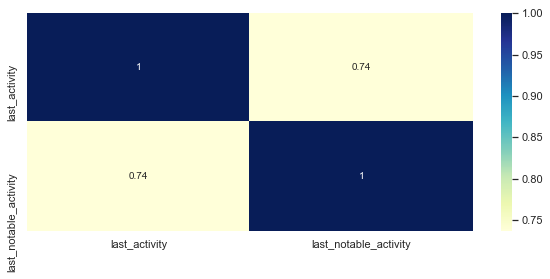

In [682]:
plt.figure(figsize = (10,4)) 
sns.heatmap(leads_df[['last_activity','last_notable_activity']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), annot=True,cmap="YlGnBu")
plt.show()

In [683]:
#The two columns are highl;y correlated ,hence we can drop column last_acitivty from the list 
leads_df.drop(['last_activity'],axis=1,inplace=True)
removed_columns.append('last_activity')

In [684]:
#Fetch the null report again 
get_nulls_report(leads_df)

In [685]:
get_column_frequency(leads_df.lead_source)

lead_source
google                    2873
direct_traffic            2543
olark_chat                1755
organic_search            1154
reference                  534
welingak_website           142
referral_sites             125
facebook                    55
NaN                         36
bing                         6
click2call                   4
live_chat                    2
social_media                 2
press_release                2
youtubechannel               1
pay_per_click_ads            1
testone                      1
blog                         1
welearn                      1
welearnblog_home             1
nc_edm                       1

In [686]:
#replace nulls by others 
#replace housewife/businessman by others as the frequency is really low
replace_colums_values(leads_df.lead_source,to_val="anonymous",replace='nulls')

for k,v in dict(leads_df.lead_source.value_counts()).items():
    if v < 10:
        leads_df.lead_source.replace(k,'other',inplace=True)

In [687]:
get_column_frequency(leads_df.lead_source)

lead_source
google                   2873
direct_traffic           2543
olark_chat               1755
organic_search           1154
reference                 534
welingak_website          142
referral_sites            125
facebook                   55
anonymous                  36
other                      23

In [688]:
#Fetch the null report again 
get_nulls_report(leads_df)

#### Find the unique value of the dataframe rows and drop columns wiht only one unique value

In [689]:
## Get categorical
var_categorical = get_variables_type(leads_df,type_of_var="CATERGORICAL")
var_categorical

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'country',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'magazine',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'receive_more_updates_about_our_courses',
 'update_me_on_supply_chain_content',
 'get_updates_on_dm_content',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

In [690]:
#Drop column with only 1 unique value
for col in var_categorical:
        if leads_df[col].nunique() == 1:
            print("Drop Column - ",col)
            leads_df.drop([col],axis=1,inplace=True)
            removed_columns.append(col)

Drop Column -  magazine
Drop Column -  receive_more_updates_about_our_courses
Drop Column -  update_me_on_supply_chain_content
Drop Column -  get_updates_on_dm_content
Drop Column -  i_agree_to_pay_the_amount_through_cheque


In [691]:
var_categorical = get_variables_type(leads_df,type_of_var="CATERGORICAL")
var_categorical

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'country',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

In [692]:
for col in var_categorical:
    display(get_column_frequency(leads_df[col]).T)

landing_page_submission   api  lead_add_form  lead_import  \
lead_origin                     4886  3580            718           55   

             quick_add_form  
lead_origin               1

google  direct_traffic  olark_chat  organic_search  reference  \
lead_source    2873            2543        1755            1154        534   

             welingak_website  referral_sites  facebook  anonymous  other  
lead_source               142             125        55         36     23

no  yes
do_not_email  8506  734

no  yes
do_not_call  9238    2

india  anonymous  other  united_states  united_arab_emirates  \
country   6492       2461     82             69                    53   

         singapore  saudi_arabia  united_kingdom  australia  qatar  
country         24            21              15         13     10

unemployed  other  working_professional  \
what_is_your_current_occupation        5600   2724                   706   

                                 student  
what_is_your_current_occupation      210

better_career_prospects  other
what_matters_most_to_you_in_choosing_a_course                     6528   2712

no  yes
search  9226   14

no  yes
newspaper_article  9238    2

no  yes
x_education_forums  9239    1

no  yes
newspaper  9239    1

no  yes
digital_advertisement  9236    4

no  yes
through_recommendations  9233    7

no   yes
a_free_copy_of_mastering_the_interview  6352  2888

modified  email_opened  sms_sent  \
last_notable_activity      3407          2827      2172   

                       page_visited_on_website  olark_chat_conversation  \
last_notable_activity                      318                      183   

                       email_link_clicked  email_bounced  unsubscribed  \
last_notable_activity                 173             60            47   

                       unreachable  had_a_phone_conversation  \
last_notable_activity           32                        14   

                       email_marked_spam  form_submitted_on_website  \
last_notable_activity                  2                          1   

                       approached_upfront  view_in_browser_link_clicked  \
last_notable_activity                   1                             1   

                       resubscribed_to_emails  email_received  
last_notable_activity                       1               1

In [693]:
# Drop the columns with very low variance in the categories
for col in ['newspaper_article',
            'x_education_forums',
            'newspaper',
            'search',
            'digital_advertisement',
            'through_recommendations',
            'do_not_call']:
    leads_df.drop([col],axis=1,inplace=True)
    removed_columns.append(col)

In [694]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
lead_origin                                      9240 non-null object
lead_source                                      9240 non-null object
do_not_email                                     9240 non-null object
converted                                        9240 non-null int64
totalvisits                                      9240 non-null float64
total_time_spent_on_website                      9240 non-null int64
page_views_per_visit                             9240 non-null float64
country                                          9240 non-null object
what_is_your_current_occupation                  9240 non-null object
what_matters_most_to_you_in_choosing_a_course    9240 non-null object
a_free_copy_of_mastering_the_interview           9240 non-null object
last_notable_activity                            9240 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage:

#### OUTLIER DETECTION AND TREATMENT

In [695]:
var_numeric = get_variables_type(leads_df,type_of_var="NUMERIC")

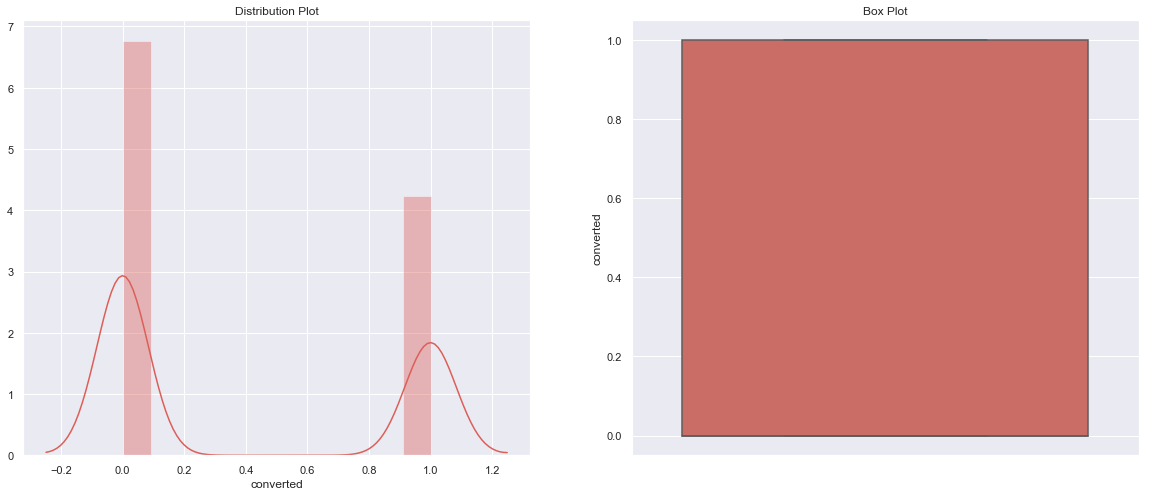

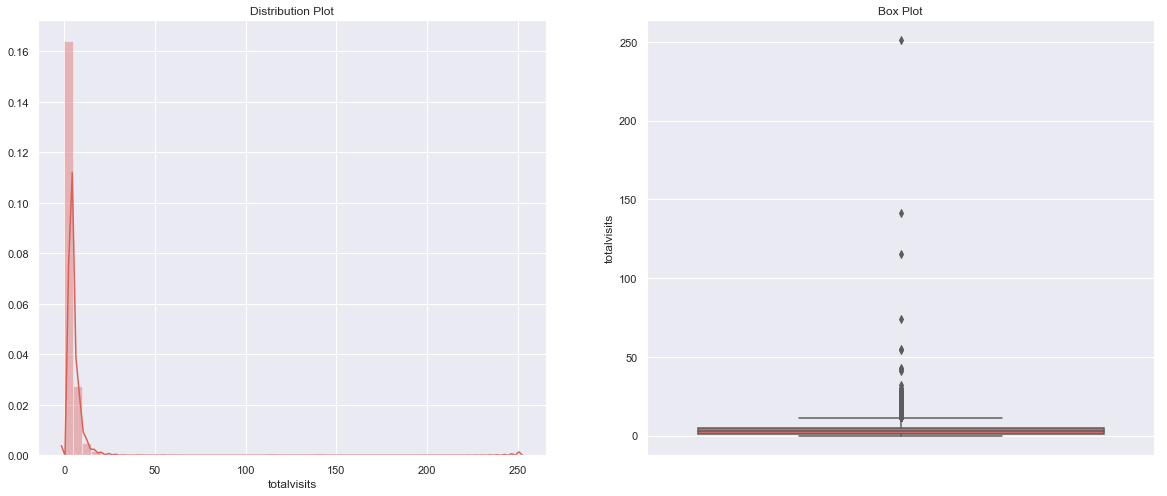

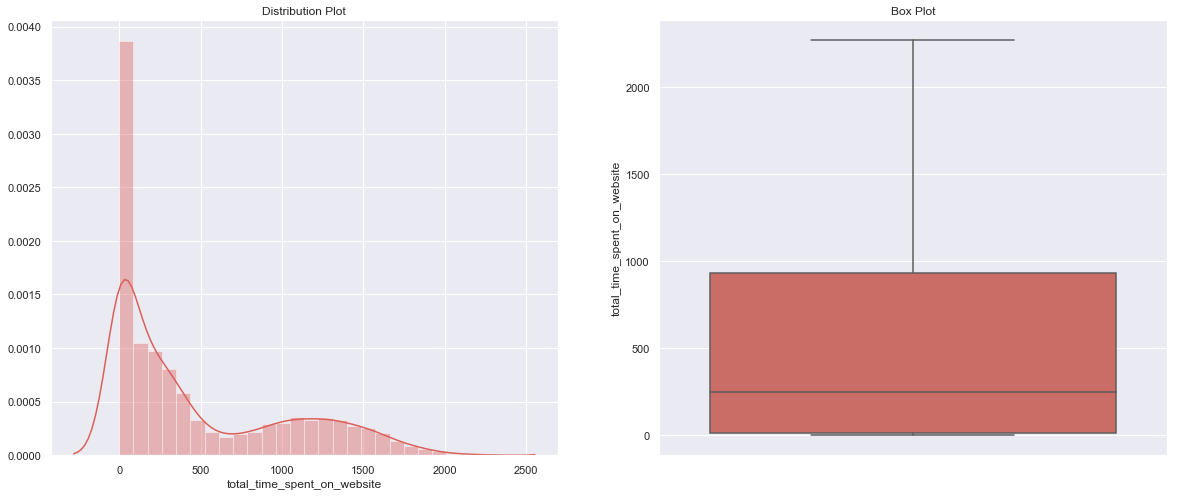

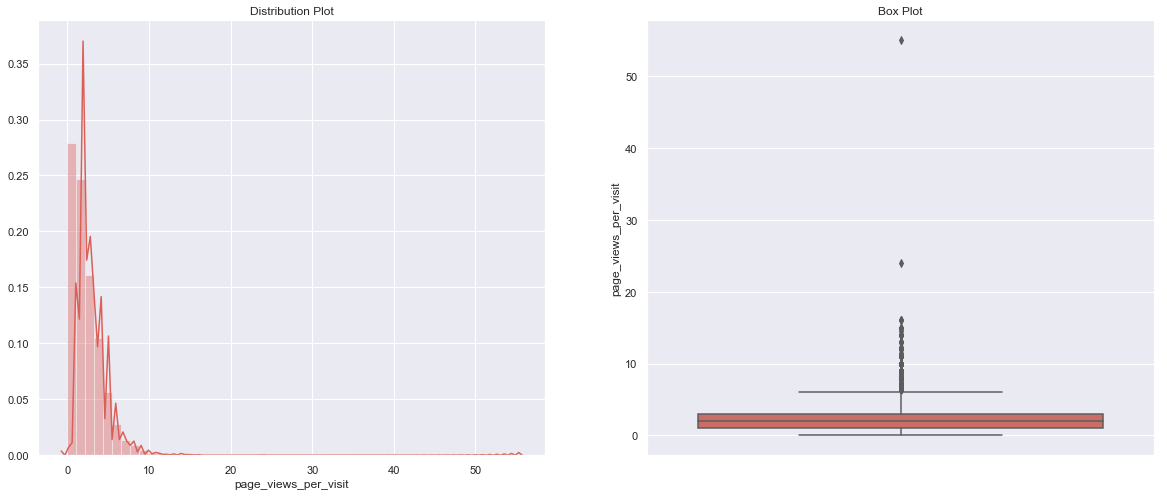

In [696]:
draw_univariate_plot(leads_df[var_numeric])

In [697]:
leads_df[var_numeric].describe()

converted  totalvisits  total_time_spent_on_website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       page_views_per_visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [698]:
leads_df[var_numeric]['totalvisits'].sort_values(ascending=False).head(30)

6102    251.0
2322    141.0
5608    115.0
5283     74.0
2190     55.0
5538     54.0
1160     43.0
8230     42.0
5530     41.0
6580     32.0
1824     30.0
8001     29.0
2861     29.0
4471     28.0
7153     28.0
7537     27.0
8624     27.0
7862     27.0
7421     27.0
2563     27.0
6702     26.0
5026     26.0
6099     25.0
9016     25.0
8203     25.0
7749     25.0
2323     25.0
5349     24.0
3315     24.0
8179     24.0
Name: totalvisits, dtype: float64

In [699]:
leads_df[var_numeric]['page_views_per_visit'].sort_values(ascending=False).head(30)

2190    55.00
6805    24.00
5495    16.00
5164    16.00
125     16.00
387     15.00
5915    15.00
8640    15.00
4518    15.00
8001    14.50
6300    14.00
1697    14.00
5531    14.00
246     14.00
7685    14.00
6051    14.00
8322    14.00
2950    14.00
8218    14.00
292     13.00
579     13.00
5026    13.00
56      13.00
6695    13.00
6951    13.00
5283    12.33
168     12.00
7505    12.00
8281    12.00
4252    12.00
Name: page_views_per_visit, dtype: float64

In [700]:
## Remove outliers
leads_df['totalvisits']=np.where(leads_df['totalvisits']>30,30,leads_df['totalvisits'])
leads_df['page_views_per_visit']=np.where(leads_df['page_views_per_visit']>16,16,leads_df['page_views_per_visit'])

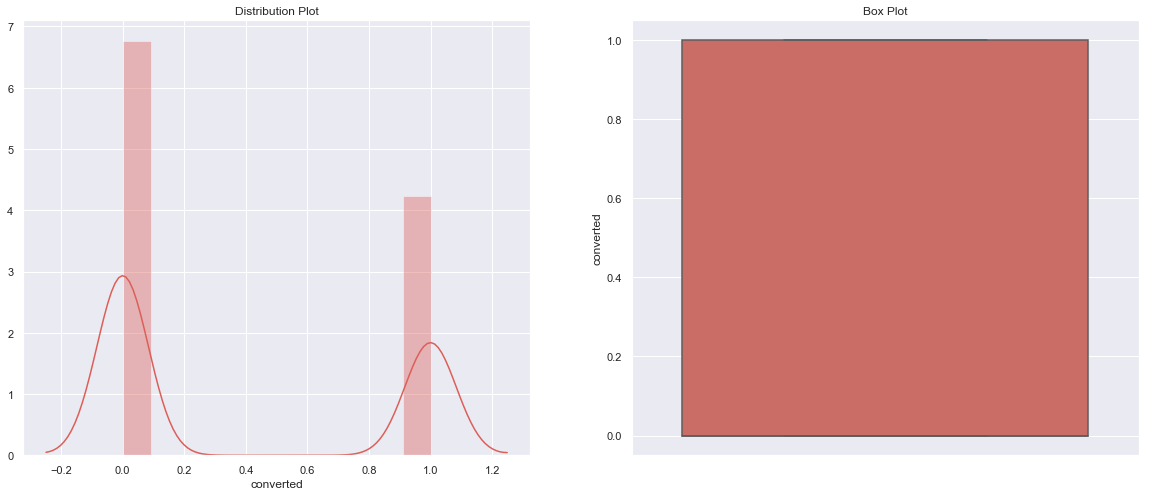

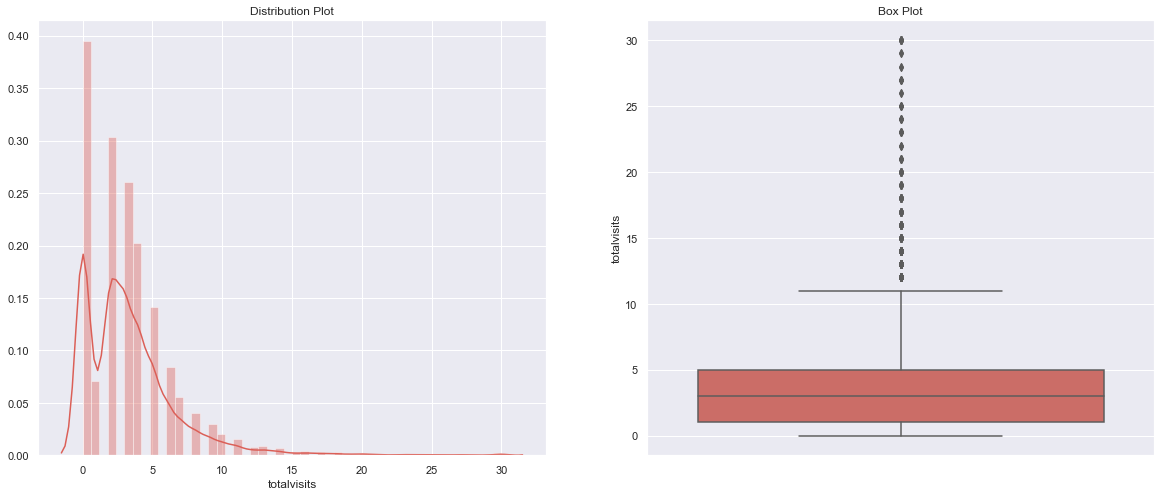

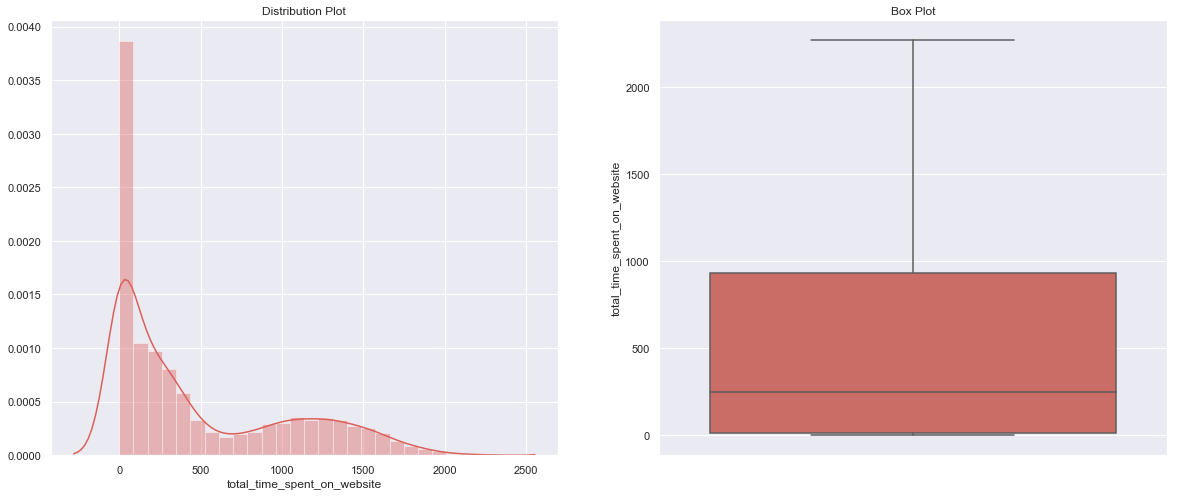

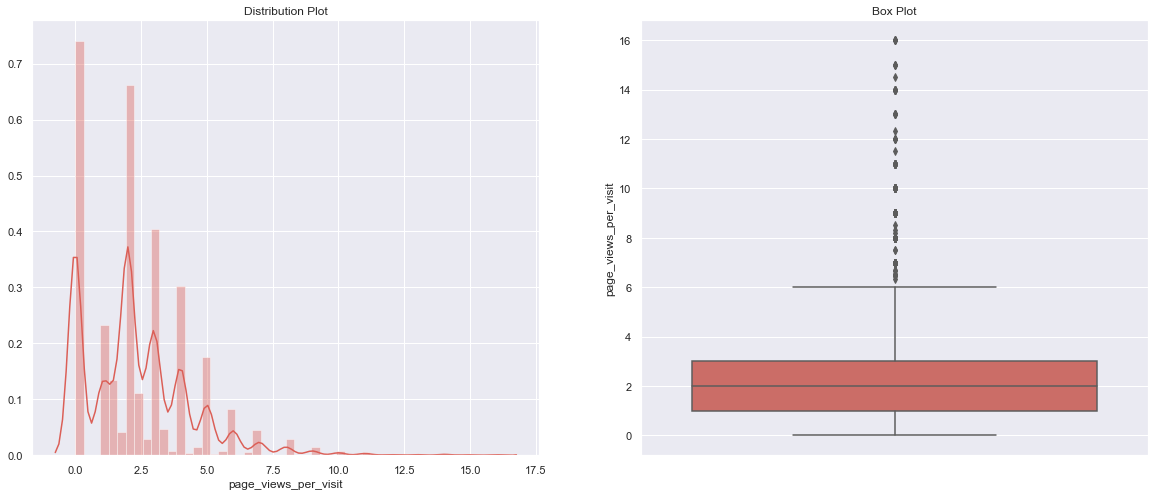

In [701]:
## Check again 
draw_univariate_plot(leads_df[var_numeric])

In [702]:
var_categorical = get_variables_type(leads_df,type_of_var="CATERGORICAL")
var_categorical

['lead_origin',
 'lead_source',
 'do_not_email',
 'country',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

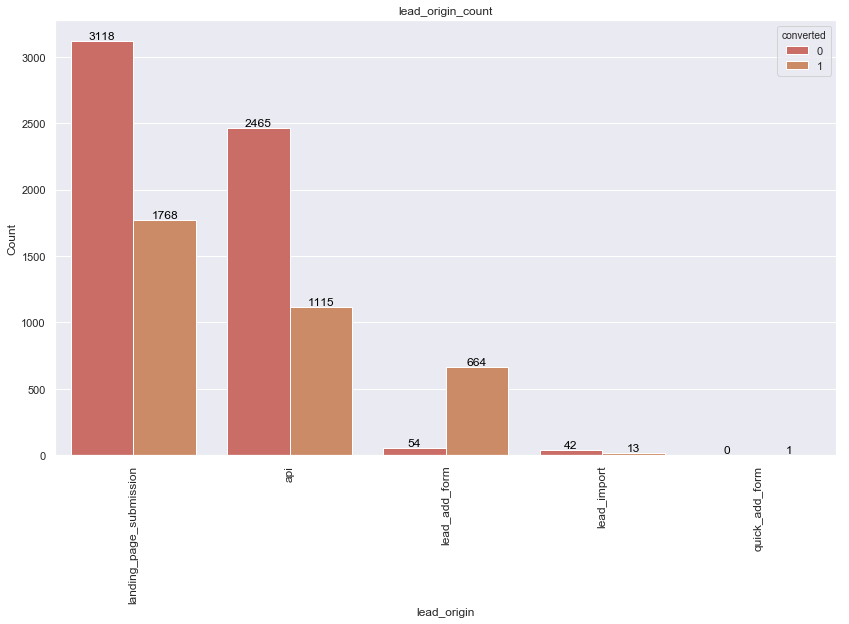

In [703]:
draw_plots(column_name='lead_origin',title='lead_origin_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - seems like only lead_add_form have the highest converion abd lead_import but the numbers are not that significant

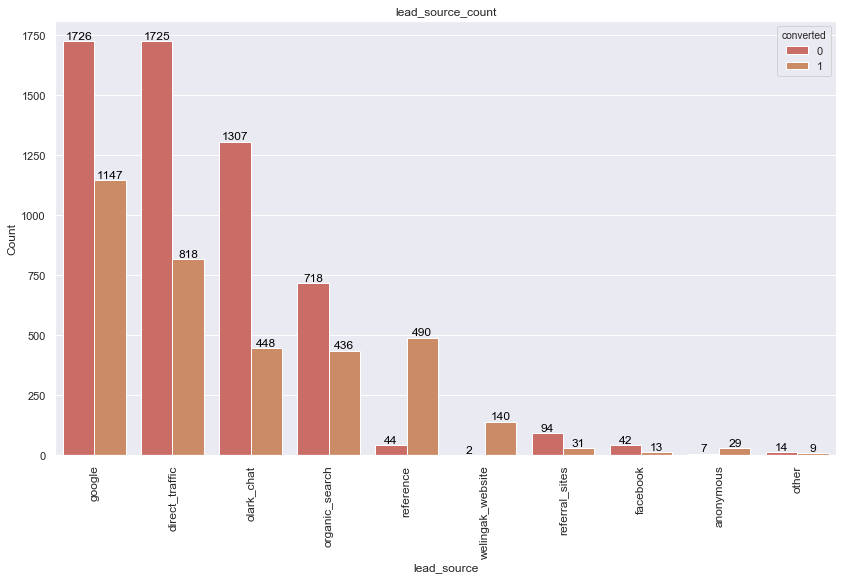

In [704]:
draw_plots(column_name='lead_source',title='lead_source_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - Seems like reference ,welinkage_website have higher conversion rate

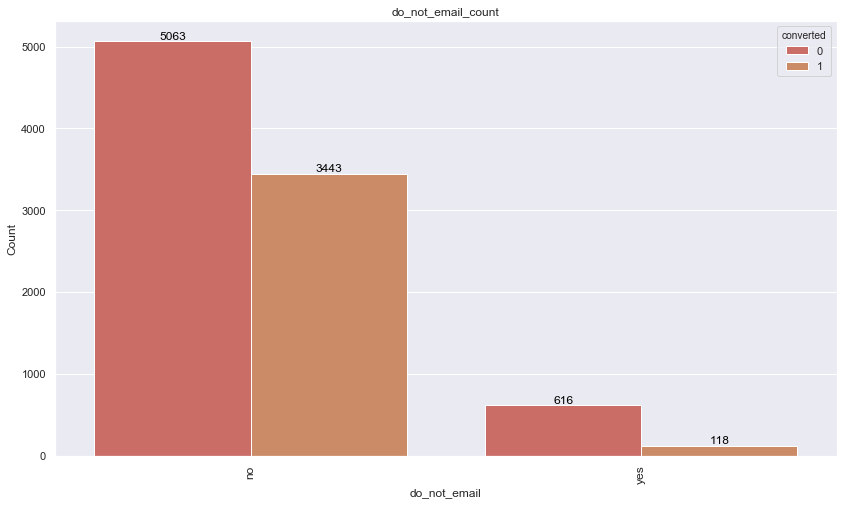

In [705]:
draw_plots(column_name='do_not_email',title='do_not_email_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - For do_not_email to yes ,conversion is higher §

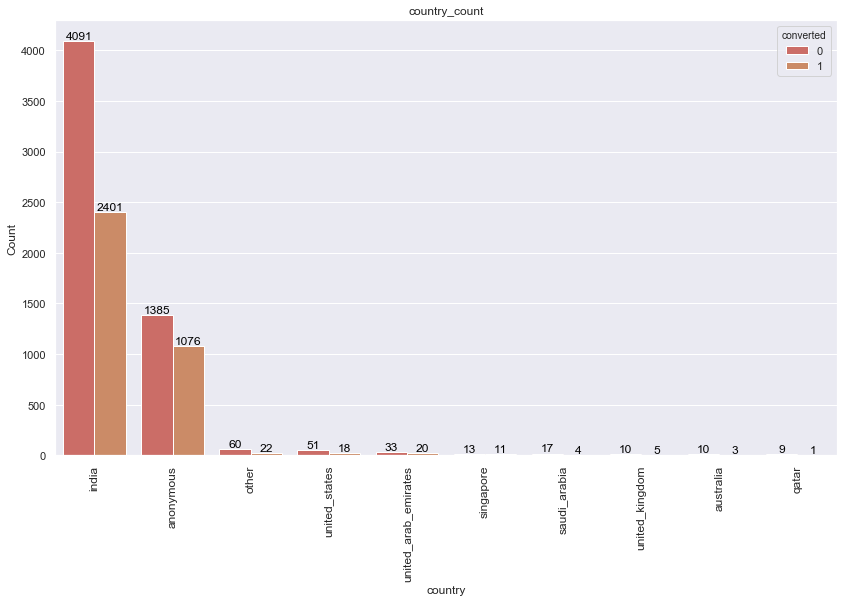

In [706]:
draw_plots(column_name='country',title='country_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - the picture is not quite clear with the numbers ,but India/and anonymous is doing quite well with the conversion ,50% are converted

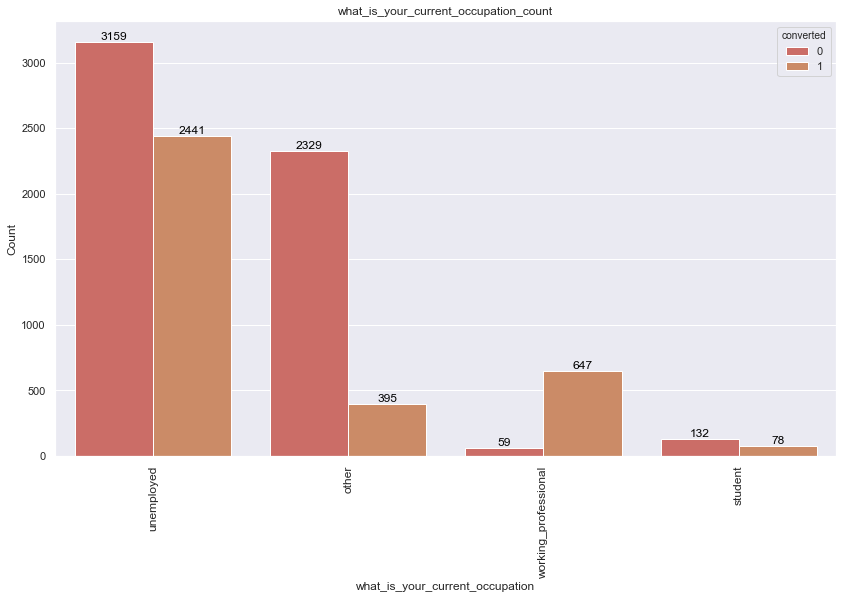

In [707]:
draw_plots(column_name='what_is_your_current_occupation',title='what_is_your_current_occupation_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - Unemployed are higher in number for accepting the offer ,whereas working profession have a positive conversion ration compared to other occupations

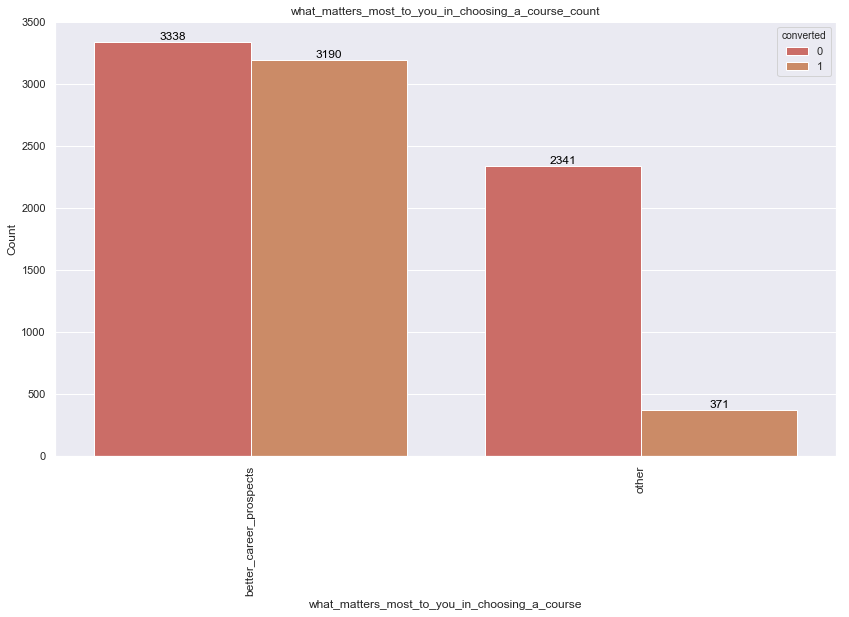

In [708]:
draw_plots(column_name='what_matters_most_to_you_in_choosing_a_course',title='what_matters_most_to_you_in_choosing_a_course_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - Better career option matters most to the people for opting the courses

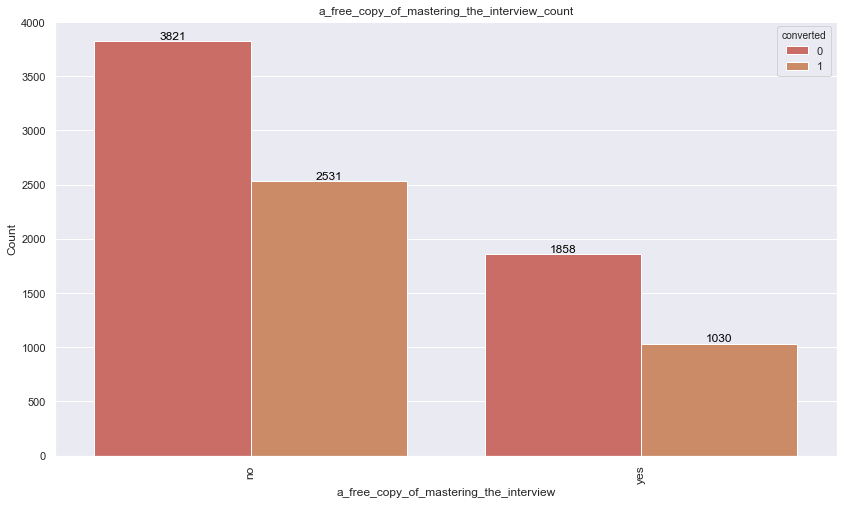

In [709]:
draw_plots(column_name='a_free_copy_of_mastering_the_interview',title='a_free_copy_of_mastering_the_interview_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - Those which gets free copy of mastering the interview have higher conversion ration

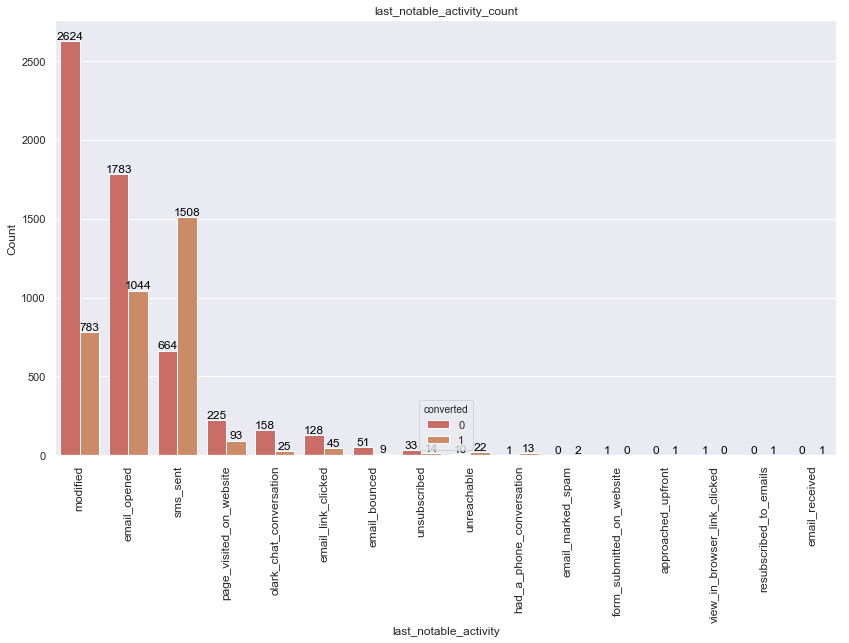

In [710]:
draw_plots(column_name='last_notable_activity',title='last_notable_activity_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - modified/email_queued have good conversion ,whereas sms_sent has more conversion

#### Creating Dummy variables

In [714]:
###Binary Dummy variables
leads_df['do_not_email'] = leads_df['do_not_email'].map({'yes': 1, 'no': 0})
leads_df['a_free_copy_of_mastering_the_interview'] = leads_df['a_free_copy_of_mastering_the_interview'].map({'yes': 1, 'no': 0})
leads_df['what_matters_most_to_you_in_choosing_a_course'] = leads_df['what_matters_most_to_you_in_choosing_a_course'].map({'better_career_prospects': 1, 'other': 0})